In [54]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')

In [26]:
field_columns = [
#                  'Sex',
#                  'Age (Years)',
#                  'Education Level',
#                  'Duration of Employment (years)',
#                  'Level of management',
                 'Cimas Medical Aid improvement in membership is above the market average of 19%',
                'Cimas Medical Aid net profit margin is above 25%',
                'Cimas medical Aid has positive cashflows',
                'Cimas Medical aid monthly collections are above 95%',
                'Cimas medical aid contribution turnover is below 30%',
                'Cimas Medical Aid a pace setter in terms of offering innovative goods and services in the industry?',
                'Cimas Medical Aid offers the best quality of medical insurance in Zimbabwe?',
                'Cimas medical aid is the market leader of the industry',
                'Cimas Medical aid is the best medical Aid in Zimbabwe and is winning new business',
                'Cimas medical aid offers great customer service and has short turnaround time when solving client quires?',
                'Cimas medical Aid exercises good marketing and has a good sales network',
                'Cimas medical Aid services are the best compared to those of their competitors in Zimbabwe.',
                'Cimas Medical Aid is excellent at product management in terms of package positioning and pricing',
                'Cimas medical aid has competent staff.',
                'Cimas Medical aid has strategic and good relationships with medical service providers.',
                'Cimas”s capacity is supports its process',
                'The Society has adequate technology, and its adaptation is excellent.',
                'Cimas Medical aid operates at an advantageous position for product and process innovation',
'Financial Perspective',
'Customer Perspective',
'Learning and Growth',
'Internal Processes',
'Organizational Perfomance']

In [30]:
X, y = make_regression(n_samples=50, n_features=18, n_informative=18, n_targets=1,
                       noise=0.0, random_state=42)

X_scaled = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0)) * 4 + 1

y_scaled = y / np.max(y) * 0.15

In [39]:
df = pd.DataFrame(np.column_stack((X_scaled[:,0], X_scaled[:,1], X_scaled[:,2], 
                                    X_scaled[:,3], X_scaled[:,4], X_scaled[:,5],
                                   X_scaled[:,6], X_scaled[:,7], X_scaled[:,8], 
                                    X_scaled[:,9], X_scaled[:,10], X_scaled[:,11],
                                   X_scaled[:,12], X_scaled[:,13], X_scaled[:,14], 
                                    X_scaled[:,15], X_scaled[:,16],X_scaled[:,17],
                                   
                                   (X_scaled[:,0]+ X_scaled[:,1]+ X_scaled[:,2]+X_scaled[:,3]+ X_scaled[:,4])/5,
                                   
                                    (X_scaled[:,5]+ X_scaled[:,6]+X_scaled[:,7]+X_scaled[:,8])/4,
                                   
                                   (X_scaled[:,13]+ X_scaled[:,14]+X_scaled[:,15]+X_scaled[:,16]+X_scaled[:,17])/5,
                                   
                                   (X_scaled[:,9]+ X_scaled[:,10]+ X_scaled[:,11]+X_scaled[:,12])/4,
                                   
                                   y_scaled)),
                  columns=field_columns)
df.head()

,Cimas Medical Aid improvement in membership is above the market average of 19%,Cimas Medical Aid net profit margin is above 25%,Cimas medical Aid has positive cashflows,Cimas Medical aid monthly collections are above 95%,Cimas medical aid contribution turnover is below 30%,Cimas Medical Aid a pace setter in terms of offering innovative goods and services in the industry?,Cimas Medical Aid offers the best quality of medical insurance in Zimbabwe?,Cimas medical aid is the market leader of the industry,Cimas Medical aid is the best medical Aid in Zimbabwe and is winning new business,Cimas medical aid offers great customer service and has short turnaround time when solving client quires?,...,Cimas medical aid has competent staff.,Cimas Medical aid has strategic and good relationships with medical service providers.,Cimas”s capacity is supports its process,"The Society has adequate technology, and its adaptation is excellent.",Cimas Medical aid operates at an advantageous position for product and process innovation,Financial Perspective,Customer Perspective,Learning and Growth,Internal Processes,Organizational Perfomance
0,2.265008,5.000000,4.109905,1.963694,1.352118,3.246323,2.699607,1.181743,1.250155,2.560918,...,1.654017,3.099964,2.066510,3.378533,2.745730,2.938145,2.094457,2.588951,3.146403,-0.079620
1,2.943315,1.769681,4.631131,1.740569,3.311893,4.376125,3.158738,2.888584,1.824886,2.262407,...,3.351119,1.834182,3.040926,1.876101,2.246940,2.879317,3.062083,2.469854,2.296600,-0.038153
2,2.362939,3.615955,2.052200,2.127710,2.117143,4.253117,3.304882,4.600552,3.434668,2.424217,...,1.873470,5.000000,2.792819,2.636833,1.734326,2.455190,3.898305,2.807489,3.033471,0.041009
3,3.250199,3.058935,3.487985,2.093086,2.057976,5.000000,4.404629,4.133015,1.925067,1.795586,...,1.476056,1.994153,3.751744,2.855350,4.969485,2.789636,3.865678,3.009358,2.415788,0.011593
4,2.442683,1.000000,2.195735,3.612214,2.676293,2.595452,3.496329,2.125500,1.951428,1.751954,...,3.744379,2.691698,3.152976,3.284714,3.685452,2.385385,2.542177,3.311844,3.145402,0.013823


In [40]:
df.columns

Index(['Cimas Medical Aid improvement in membership is above the market average of 19%',
       'Cimas Medical Aid net profit margin is above 25%',
       'Cimas medical Aid has positive cashflows',
       'Cimas Medical aid monthly collections are above 95%',
       'Cimas medical aid contribution turnover is below 30%',
       'Cimas Medical Aid a pace setter in terms of offering innovative goods and services in the industry?',
       'Cimas Medical Aid offers the best quality of medical insurance in Zimbabwe?',
       'Cimas medical aid is the market leader of the industry',
       'Cimas Medical aid is the best medical Aid in Zimbabwe and is winning new business',
       'Cimas medical aid offers great customer service and has short turnaround time when solving client quires?',
       'Cimas medical Aid exercises good marketing and has a good sales network',
       'Cimas medical Aid services are the best compared to those of their competitors in Zimbabwe.',
       'Cimas Medical A

In [41]:
X = df.drop('Organizational Perfomance',axis=1)
y = df['Organizational Perfomance']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
r_squared = model.rsquared
print(r_squared)

1.0


In [42]:
X = X.round(0)
X.head()

,const,Cimas Medical Aid improvement in membership is above the market average of 19%,Cimas Medical Aid net profit margin is above 25%,Cimas medical Aid has positive cashflows,Cimas Medical aid monthly collections are above 95%,Cimas medical aid contribution turnover is below 30%,Cimas Medical Aid a pace setter in terms of offering innovative goods and services in the industry?,Cimas Medical Aid offers the best quality of medical insurance in Zimbabwe?,Cimas medical aid is the market leader of the industry,Cimas Medical aid is the best medical Aid in Zimbabwe and is winning new business,...,Cimas Medical Aid is excellent at product management in terms of package positioning and pricing,Cimas medical aid has competent staff.,Cimas Medical aid has strategic and good relationships with medical service providers.,Cimas”s capacity is supports its process,"The Society has adequate technology, and its adaptation is excellent.",Cimas Medical aid operates at an advantageous position for product and process innovation,Financial Perspective,Customer Perspective,Learning and Growth,Internal Processes
0,1.0,2.0,5.0,4.0,2.0,1.0,3.0,3.0,1.0,1.0,...,4.0,2.0,3.0,2.0,3.0,3.0,3.0,2.0,3.0,3.0
1,1.0,3.0,2.0,5.0,2.0,3.0,4.0,3.0,3.0,2.0,...,2.0,3.0,2.0,3.0,2.0,2.0,3.0,3.0,2.0,2.0
2,1.0,2.0,4.0,2.0,2.0,2.0,4.0,3.0,5.0,3.0,...,3.0,2.0,5.0,3.0,3.0,2.0,2.0,4.0,3.0,3.0
3,1.0,3.0,3.0,3.0,2.0,2.0,5.0,4.0,4.0,2.0,...,2.0,1.0,2.0,4.0,3.0,5.0,3.0,4.0,3.0,2.0
4,1.0,2.0,1.0,2.0,4.0,3.0,3.0,3.0,2.0,2.0,...,3.0,4.0,3.0,3.0,3.0,4.0,2.0,3.0,3.0,3.0


In [44]:
data = X
data['Organizational Perfomance'] = y.round(3)
data.head()

,const,Cimas Medical Aid improvement in membership is above the market average of 19%,Cimas Medical Aid net profit margin is above 25%,Cimas medical Aid has positive cashflows,Cimas Medical aid monthly collections are above 95%,Cimas medical aid contribution turnover is below 30%,Cimas Medical Aid a pace setter in terms of offering innovative goods and services in the industry?,Cimas Medical Aid offers the best quality of medical insurance in Zimbabwe?,Cimas medical aid is the market leader of the industry,Cimas Medical aid is the best medical Aid in Zimbabwe and is winning new business,...,Cimas medical aid has competent staff.,Cimas Medical aid has strategic and good relationships with medical service providers.,Cimas”s capacity is supports its process,"The Society has adequate technology, and its adaptation is excellent.",Cimas Medical aid operates at an advantageous position for product and process innovation,Financial Perspective,Customer Perspective,Learning and Growth,Internal Processes,Organizational Perfomance
0,1.0,2.0,5.0,4.0,2.0,1.0,3.0,3.0,1.0,1.0,...,2.0,3.0,2.0,3.0,3.0,3.0,2.0,3.0,3.0,-0.080
1,1.0,3.0,2.0,5.0,2.0,3.0,4.0,3.0,3.0,2.0,...,3.0,2.0,3.0,2.0,2.0,3.0,3.0,2.0,2.0,-0.038
2,1.0,2.0,4.0,2.0,2.0,2.0,4.0,3.0,5.0,3.0,...,2.0,5.0,3.0,3.0,2.0,2.0,4.0,3.0,3.0,0.041
3,1.0,3.0,3.0,3.0,2.0,2.0,5.0,4.0,4.0,2.0,...,1.0,2.0,4.0,3.0,5.0,3.0,4.0,3.0,2.0,0.012
4,1.0,2.0,1.0,2.0,4.0,3.0,3.0,3.0,2.0,2.0,...,4.0,3.0,3.0,3.0,4.0,2.0,3.0,3.0,3.0,0.014


In [46]:
data.to_excel('data.xlsx')

In [47]:
data.shape

(50, 24)

In [48]:
main_col = ['Financial Perspective',
'Customer Perspective',
'Learning and Growth',
'Internal Processes',
'Organizational Perfomance']

In [49]:
data = data[main_col]

In [50]:
data.head()

,Financial Perspective,Customer Perspective,Learning and Growth,Internal Processes,Organizational Perfomance
0,3.0,2.0,3.0,3.0,-0.080
1,3.0,3.0,2.0,2.0,-0.038
2,2.0,4.0,3.0,3.0,0.041
3,3.0,4.0,3.0,2.0,0.012
4,2.0,3.0,3.0,3.0,0.014


In [55]:
def missing_value_table(data):
    missing_value = data.isna().sum().sort_values(ascending=False)
    missing_value_percent = 100 * data.isna().sum()//len(data)
    missing_value_table = pd.concat([missing_value, missing_value_percent], axis=1)
    missing_value_table_return = missing_value_table.rename(columns = {0 : 'Missing Values', 1 : '% Value'})
    cm = sns.light_palette("lightblue", as_cmap=True)
    missing_value_table_return = missing_value_table_return.style.background_gradient(cmap=cm)
    return missing_value_table_return
  
missing_value_table(data)

,Missing Values,% Value
Financial Perspective,0,0
Customer Perspective,0,0
Learning and Growth,0,0
Internal Processes,0,0
Organizational Perfomance,0,0


In [56]:
def unique_value(data_set, column_name):
    return data_set[column_name].nunique()

print("Number of the Unique Values:")
print(unique_value(data,list(data.columns)))

Number of the Unique Values:
Financial Perspective         3
Customer Perspective          3
Learning and Growth           3
Internal Processes            3
Organizational Perfomance    42
dtype: int64


In [57]:
data_copy = data.copy(deep=True)

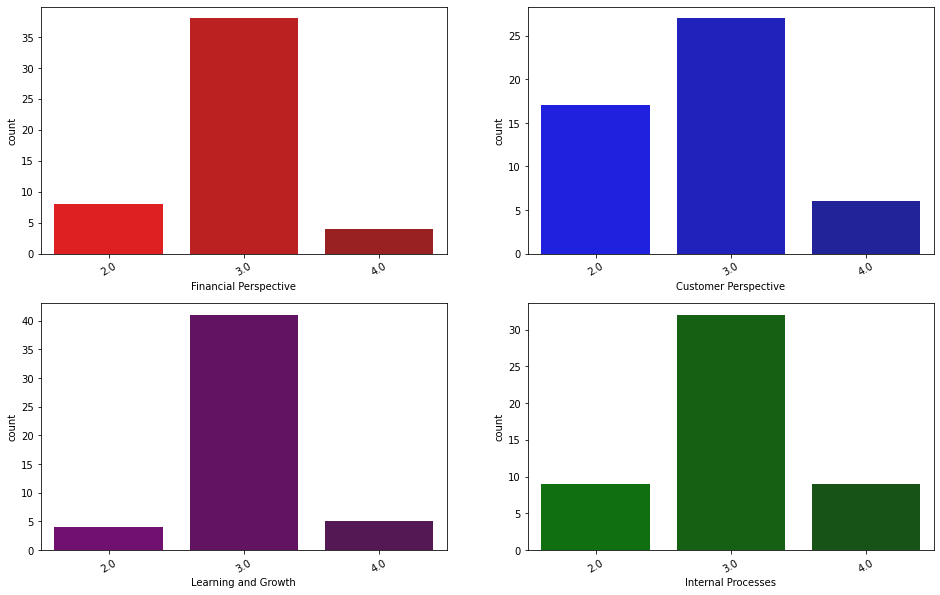

In [61]:
fig,ax=plt.subplots(ncols=2,nrows=2,figsize=(16,10))
cat_list=['Financial Perspective', 'Customer Perspective', 'Learning and Growth',
       'Internal Processes']
palette=["red","blue","purple","green"]
count=0
for i in range(2):
    for j in range(2):
        sns.countplot(data[cat_list[count]],ax=ax[i][j],palette=sns.dark_palette(palette[count],reverse=True))
        ax[i][j].set_xticklabels(ax[i][j].get_xticklabels(),rotation=30)
        count+=1

<AxesSubplot:>

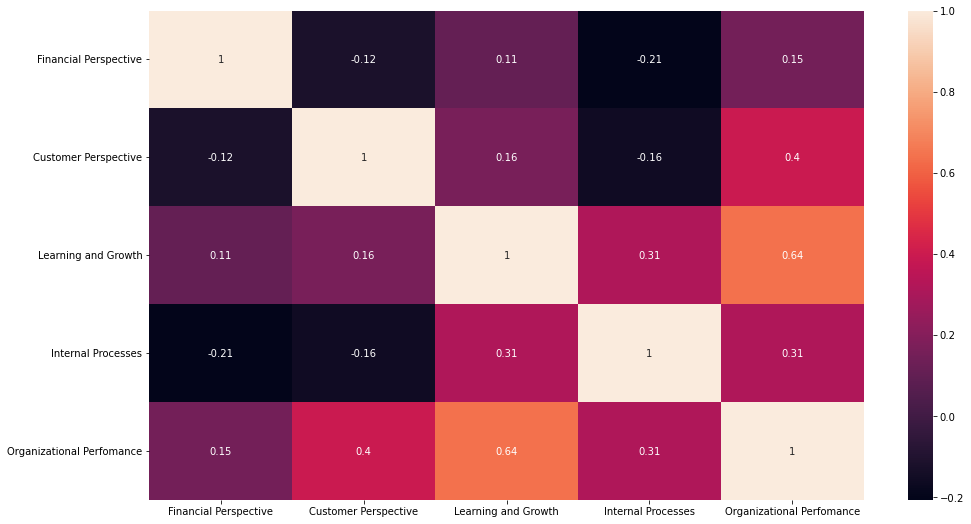

In [63]:
plt.figure(figsize=(16,9))
sns.heatmap(data.corr(),annot=True)

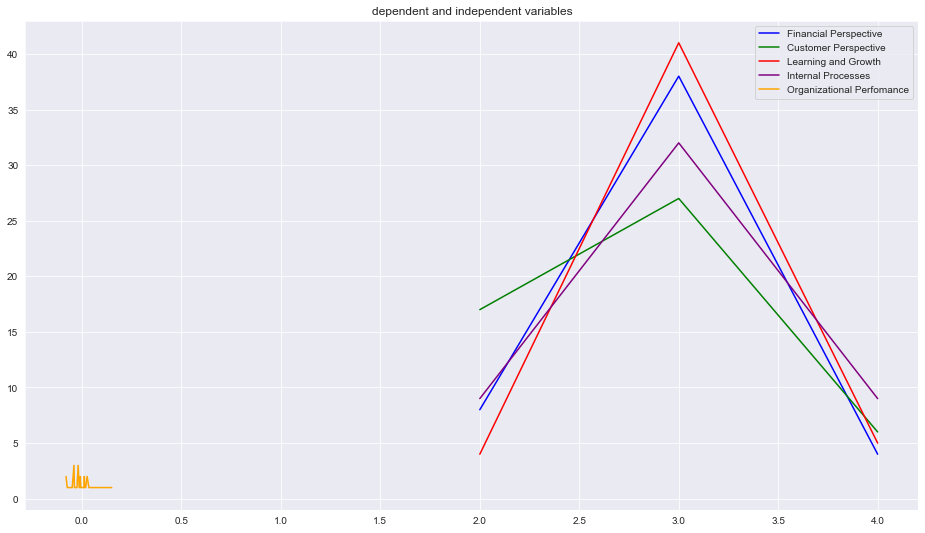

In [64]:
plt.figure(figsize=(16,9))

sns.set_style("darkgrid")

counts1 = data["Financial Perspective"].value_counts()
counts2 = data["Customer Perspective"].value_counts()
counts3 = data["Learning and Growth"].value_counts()
counts4 = data["Internal Processes"].value_counts()
counts5 = data["Organizational Perfomance"].value_counts()

sns.lineplot(x=counts1.index, y=counts1.values, color="blue", label="Financial Perspective")
sns.lineplot(x=counts2.index, y=counts2.values, color="green", label="Customer Perspective")
sns.lineplot(x=counts3.index, y=counts3.values, color="red", label="Learning and Growth")
sns.lineplot(x=counts4.index, y=counts4.values, color="purple", label="Internal Processes")
sns.lineplot(x=counts5.index, y=counts5.values, color="orange", label="Organizational Perfomance")

plt.title("dependent and independent variables")

plt.legend()
plt.show()

In [65]:
X = sm.add_constant(X)
model2 = sm.OLS(y, X).fit()
print(model2.summary())

                                OLS Regression Results                               
Dep. Variable:     Organizational Perfomance   R-squared:                       0.565
Model:                                   OLS   Adj. R-squared:                  0.526
Method:                        Least Squares   F-statistic:                     14.61
Date:                       Wed, 24 May 2023   Prob (F-statistic):           1.01e-07
Time:                               23:23:39   Log-Likelihood:                 97.863
No. Observations:                         50   AIC:                            -185.7
Df Residuals:                             45   BIC:                            -176.2
Df Model:                                  4                                         
Covariance Type:                   nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

In [66]:
import scipy.stats as ss
from collections import Counter
import math 
from matplotlib import pyplot as plt
from scipy import stats
from IPython.display import display, Markdown, Latex
from sklearn.preprocessing import StandardScaler 
from statsmodels.tsa.stattools import adfuller

from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

ridge_model = Ridge(alpha=1)

ridge_model.fit(X, y)

y_pred = ridge_model.predict(X)

r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)

mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)
r2_adj = 1 - (1 - r2) * (len(y) - 1) / (len(y) - X.shape[1] - 1)
f_statistic = (r2 / X.shape[1]) / ((1 - r2) / (len(y) - X.shape[1] - 1))
p_value = 1 - stats.f.cdf(f_statistic, X.shape[1], len(y) - X.shape[1] - 1)

print('MSE:', mse)
print('RMSE:', rmse)
print("Mean absolute error:", mae)
print('R-squared:', r2)
print('R-squared adjusted:', r2_adj)
print('F-statistic:', f_statistic)
print('p-value:', p_value)

MSE: 0.0011749587704078383
RMSE: 0.03427767160131852
Mean absolute error: 0.028176945110077324
R-squared: 0.5624582196586569
R-squared adjusted: 0.5127375628016861
F-statistic: 11.312365025197785
p-value: 4.735083508622395e-07


In [67]:
from scipy.stats import chi2_contingency

table = pd.crosstab(y, [
    data["Financial Perspective"],
    data["Customer Perspective"],
    data["Learning and Growth"],
    data["Internal Processes"],
    data["Organizational Perfomance"]
])

# Performing the chi-square test
stat, p, dof, expected = chi2_contingency(table)

print("Chi-square statistic:", stat)
print("P-value:", p)
print("Degrees of freedom:", dof)

Chi-square statistic: 2050.0000000000005
P-value: 0.02550911263215119
Degrees of freedom: 1927


In [69]:
from scipy.stats import mannwhitneyu

group1 = data[data.index < 25]
group2 = data[data.index >= 25]

stat, p_value = mannwhitneyu(group1['Organizational Perfomance'], group2['Organizational Perfomance'])

print(f"Mann-Whitney U statistic: {stat}")
print(f"P-value: {p_value}")

Mann-Whitney U statistic: 260.5
P-value: 0.317535690825382


In [70]:
from scipy.stats import ttest_ind

group1 = data[data['Organizational Perfomance'] > 0]['Organizational Perfomance']
group2 = data[data['Organizational Perfomance'] <= 0]['Organizational Perfomance']

stat, p = ttest_ind(group1, group2)

print("T-statistic:", stat)
print("P-value:", p)

T-statistic: 9.929074168131486
P-value: 3.1959084100782083e-13


In [ ]:
import reliability

data = reliability.load_data("data.csv")

# Fit a Weibull distribution to the data
distribution = reliability.WeibullDistribution()
distribution.fit(data)

# Calculate the probability of failure at 100 hours
probability_of_failure = distribution.probability_of_failure(100)

print(probability_of_failure)

In [74]:
pip install pingouin

     ---------------------------------------- 0.0/198.6 kB ? eta -:--:--
     -------- ------------------------------ 41.0/198.6 kB 1.9 MB/s eta 0:00:01
     ----------- ------------------------- 61.4/198.6 kB 812.7 kB/s eta 0:00:01
     ----------------- ------------------- 92.2/198.6 kB 744.7 kB/s eta 0:00:01
     --------------------------- -------- 153.6/198.6 kB 913.1 kB/s eta 0:00:01
     ------------------------------------ 198.6/198.6 kB 923.2 kB/s eta 0:00:00
     ---------------------------------------- 0.0/14.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/14.7 MB 2.0 MB/s eta 0:00:08
     ---------------------------------------- 0.1/14.7 MB 1.4 MB/s eta 0:00:11
      --------------------------------------- 0.2/14.7 MB 1.5 MB/s eta 0:00:10
      --------------------------------------- 0.2/14.7 MB 1.4 MB/s eta 0:00:11
      --------------------------------------- 0.2/14.7 MB 1.4 MB/s eta 0:00:11
      --------------------------------------- 0.3/14.7 MB 1.

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
tf-models-official 2.11.2 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.11.2 requires immutabledict, which is not installed.
tf-models-official 2.11.2 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.11.2 requires oauth2client, which is not installed.
tf-models-official 2.11.2 requires py-cpuinfo>=3.3.0, which is not installed.
tf-models-official 2.11.2 requires sentencepiece, which is not installed.
tf-models-official 2.11.2 requires seqeval, which is not installed.
tf-models-official 2.11.2 requires tensorflow-datasets, which is not installed.
tf-models-official 2.11.2 requires tensorflow-hub>=0.6.0, which is not installed.
tf-models-official 2.11.2 requires tensorflow-model-optimization

In [73]:
import pingouin as pg

pg.cronbach_alpha(data=data)

ModuleNotFoundError: No module named 'pingouin'

In [71]:
data.to_excel('data_50.xlsx')